정규화를 해서 dt에 넣어보기 -> 모든 데이터를 0~1 사이의 값이 될 수 있또록
lead_time, avg_price_per_room -> cate ->  num으로 바꾸기


In [7]:
!pip install -U imbalanced-learn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 226.0/226.0 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.tree import plot_tree


In [84]:

train = pd.read_csv('final_train.csv')
train.keys()

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'meal_type_1', 'meal_type_2', 'meal_type_3', 'meal_type_4',
       'room_type_1', 'room_type_2', 'room_type_3', 'room_type_4',
       'room_type_5', 'room_type_6', 'room_type_7', 'Corporate',
       'Complementary', 'Online', 'Offline', 'Aviation',
       'lead_time_under_iqr_1', 'lead_time_under_iqr_2',
       'lead_time_under_iqr_3', 'lead_time_under_iqr_4', 'price_under_iqr_1',
       'price_under_iqr_2', 'price_under_iqr_3', 'price_under_iqr_4',
       'lead_time_norm', 'price_norm'],
      dtype='object')

In [ ]:
X = train[feature_names]
y = train["booking_status"]
smote = SMOTEENN(random_state = 0)
X_train_over, y_train_over = smote.fit_resample(X, y)

In [108]:
'''
feature_names = ['no_of_adults', 'no_of_children',
'no_of_weekend_nights',
                 'no_of_week_nights', 'required_car_parking_space',
                 'lead_time', 'arrival_year', 'arrival_month',
                 'arrival_date', 'repeated_guest',
                 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                 'avg_price_per_room', 'no_of_special_requests',
                 'meal_type_1', 'meal_type_2', 'meal_type_3', 'meal_type_4',
                 'room_type_1', 'room_type_2', 'room_type_3', 'room_type_4',
                 'room_type_5', 'room_type_6', 'room_type_7', 'Corporate',
                 'Complementary', 'Online', 'Offline', 'Aviation']
'''

train = pd.read_csv('final_train.csv')
train['lead_12'] = train['lead_time_under_iqr_1'] + train['lead_time_under_iqr_2']
train['lead_34'] = train['lead_time_under_iqr_3'] + train['lead_time_under_iqr_4']
train['price_12'] = train['price_under_iqr_1'] + train['price_under_iqr_2']
train['price_34'] = train['price_under_iqr_3'] + train['price_under_iqr_4']

feature_names = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space',
       'arrival_year', 'arrival_month',
       'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'no_of_special_requests', 
       'meal_type_1', 'meal_type_2', 'meal_type_3', 'meal_type_4',
       'room_type_1', 'room_type_2', 'room_type_3', 'room_type_4',
       'room_type_5', 'room_type_6', 'room_type_7', 'Corporate',
       'Complementary', 'Online', 'Offline', 'Aviation', 'lead_time', 'avg_price_per_room']

# 87 프로 피쳐
# train = pd.read_csv('onehot_sample.csv')

# feature_names = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
#                  'no_of_week_nights', 'required_car_parking_space',
#                  'lead_time', 'arrival_year', 'arrival_month',
#                  'arrival_date', 'repeated_guest',
#                  'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
#                  'avg_price_per_room', 'no_of_special_requests',
#                  'meal_type_1', 'meal_type_2', 'meal_type_3', 'meal_type_4',
#                  'room_type_1', 'room_type_2', 'room_type_3', 'room_type_4',
#                  'room_type_5', 'room_type_6', 'room_type_7', 'Corporate',
#                  'Complementary', 'Online', 'Offline', 'Aviation']
# dt_model = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 2, min_samples_split = 2, criterion="gini", max_features = 30)

X = train[feature_names]
y = train["booking_status"]
smote = SMOTE(random_state = 42)
# Decision Tree 학습/예측/평가
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# Decision Tree 학습/예측/평가
dt_model = DecisionTreeClassifier(
    max_depth=15, min_samples_leaf=8, min_samples_split=10, criterion="gini", max_features=25)
scores = cross_val_score(dt_model, X, y, cv = 50)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.85433071 0.88976378 0.86023622 0.84645669 0.8484252  0.85433071
 0.86417323 0.88385827 0.87992126 0.86023622 0.87007874 0.85826772
 0.87204724 0.86023622 0.87401575 0.87992126 0.86220472 0.85826772
 0.85826772 0.87598425 0.86614173 0.86023622 0.88188976 0.88385827
 0.87007874 0.87204724 0.8996063  0.87795276 0.87401575 0.88188976
 0.85629921 0.87598425 0.86023622 0.83070866 0.87007874 0.86614173
 0.86811024 0.85433071 0.87007874 0.86811024 0.87992126 0.87204724
 0.88560158 0.89940828 0.84812623 0.86193294 0.84812623 0.85009862
 0.86390533 0.85798817]
Average CV Score:  0.867319495566013
Number of CV Scores used in Average:  50


In [77]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25, 20))
    _ = dt_model.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['No Disease', "Disease"],
                       filled=True)


def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(
        y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(
        y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))


params = {
    'max_depth' : [8, 10, 15, 20], 
    'min_samples_leaf' : [2, 4, 6, 8], 
    'min_samples_split' : [2, 4, 6, 8],
    'max_features' : [25, 30, 25, 40, 'sqrt'],
    'max_leaf_nodes' : [15, 20, 25, 30, 35]
}

# params = {
#     'max_features' : [5, 10]
# }

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt_model,
                           param_grid=params,
                           cv=10, n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)
score_df = pd.DataFrame(grid_search.cv_results_)
# score_df.to_csv('dt_model_grid_search.csv')
score_df.nlargest(5, "mean_test_score")


Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
877,0.327951,0.045861,0.011306,0.001397,15,25,35,8,4,"{'max_depth': 15, 'max_features': 25, 'max_lea...",...,0.867553,0.843427,0.839488,0.861645,0.847366,0.848843,0.859675,0.850687,0.009556,1
1277,0.275231,0.027074,0.013441,0.008577,20,25,35,8,4,"{'max_depth': 20, 'max_features': 25, 'max_lea...",...,0.865583,0.845889,0.840473,0.855736,0.849828,0.844412,0.855244,0.850539,0.007063,2
635,0.258085,0.046919,0.009558,0.002206,10,25,35,6,8,"{'max_depth': 10, 'max_features': 25, 'max_lea...",...,0.862629,0.841457,0.849828,0.855244,0.850320,0.846873,0.853767,0.850490,0.006785,3
477,0.134969,0.009489,0.006054,0.001489,10,25,35,8,4,"{'max_depth': 10, 'max_features': 25, 'max_lea...",...,0.869522,0.847366,0.841950,0.859183,0.850320,0.843427,0.854259,0.850294,0.008376,4
478,0.134753,0.005889,0.005800,0.001168,10,25,35,8,6,"{'max_depth': 10, 'max_features': 25, 'max_lea...",...,0.865583,0.850812,0.840965,0.856228,0.853767,0.848351,0.852290,0.850244,0.008466,5


In [109]:

dt_model.fit(X_train_over, y_train_over)


DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=25,
                       min_samples_leaf=8, min_samples_split=10)

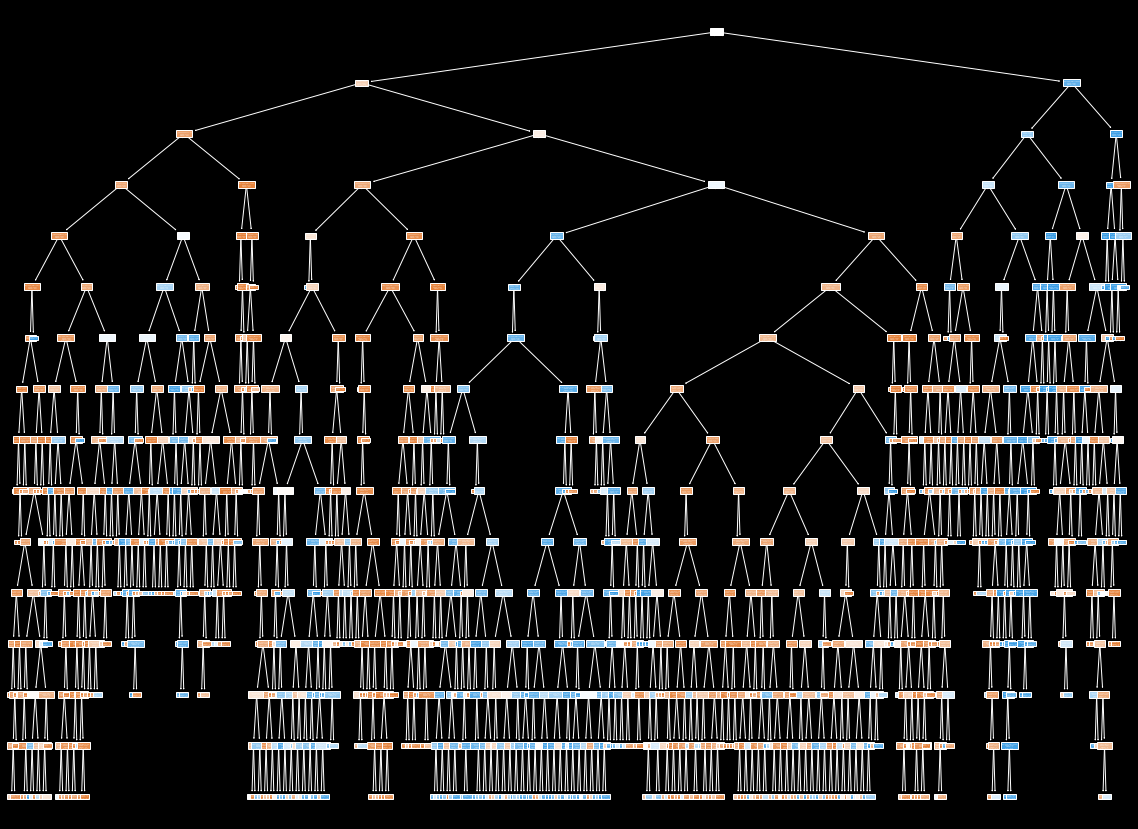

In [91]:
plt.figure(figsize=(20, 15))
plot_tree(dt_model, filled=True, feature_names=X_train.keys())
plt.show()


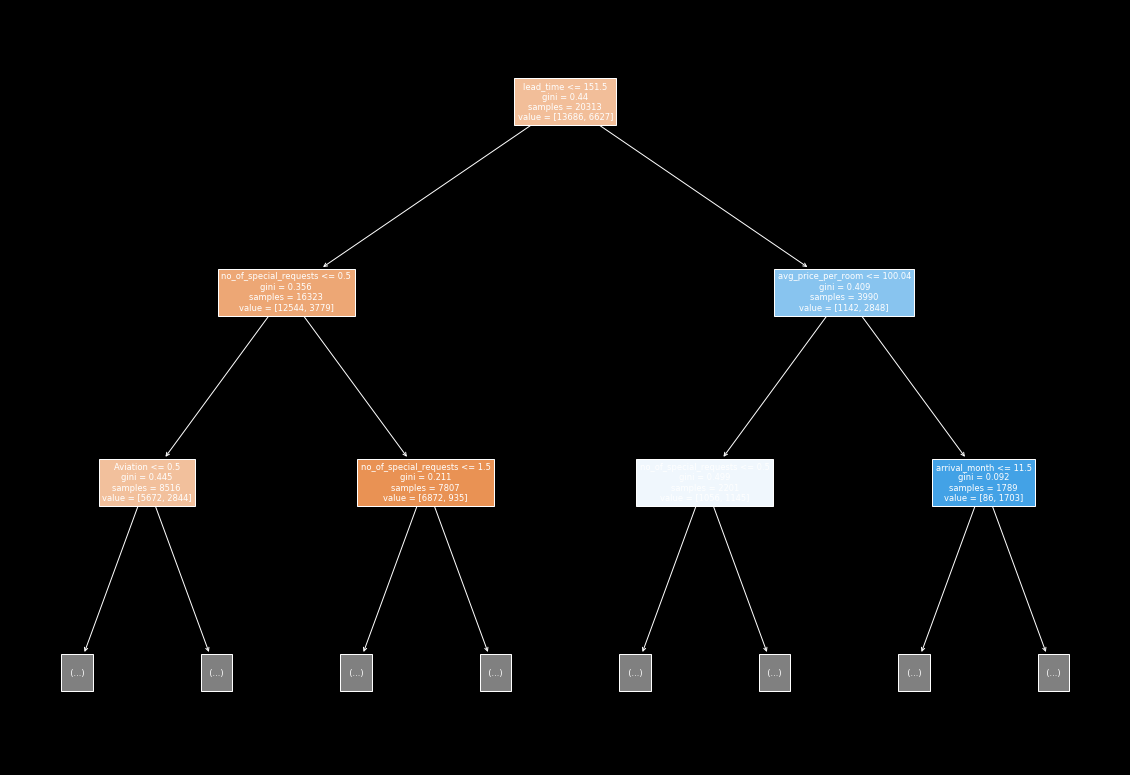

In [81]:
plt.figure(figsize=(20, 14))
plot_tree(dt_model, max_depth=2, filled=True,
          feature_names=X_train.keys())
plt.show()


Feature Importances:
[0.015 0.001 0.022 0.019 0.008 0.018 0.08  0.035 0.002 0.    0.001 0.131
 0.014 0.037 0.    0.009 0.001 0.001 0.    0.01  0.001 0.    0.    0.001
 0.    0.009 0.    0.111 0.34  0.135]

no_of_adults: 0.015
no_of_children: 0.001
no_of_weekend_nights: 0.022
no_of_week_nights: 0.019
required_car_parking_space: 0.008
arrival_year: 0.018
arrival_month: 0.080
arrival_date: 0.035
repeated_guest: 0.002
no_of_previous_cancellations: 0.000
no_of_previous_bookings_not_canceled: 0.001
no_of_special_requests: 0.131
meal_type_1: 0.014
meal_type_2: 0.037
meal_type_3: 0.000
meal_type_4: 0.009
room_type_1: 0.001
room_type_2: 0.001
room_type_3: 0.000
room_type_4: 0.010
room_type_5: 0.001
room_type_6: 0.000
room_type_7: 0.000
Corporate: 0.001
Complementary: 0.000
Online: 0.009
Offline: 0.000
Aviation: 0.111
lead_time: 0.340
avg_price_per_room: 0.135


<AxesSubplot:>

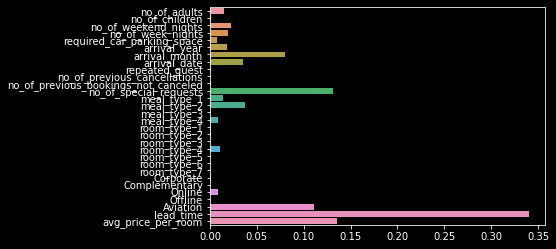

In [114]:
import numpy as np
import seaborn as sb

# feature importance 추출
print("Feature Importances:\n{0}\n".format(
    np.round(dt_model.feature_importances_, 3)))

# feature 별 feature importance 매핑
for name, value in zip(X_train.keys(), dt_model.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))

# feature importance 시각화
sb.barplot(x=dt_model.feature_importances_, y=X_train.keys())


In [98]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end,
                         num=200), np.linspace(ylim_start, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)


C:\Users\sksoh\AppData\Local\Temp\ipykernel_21752\2723777972.py:22: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


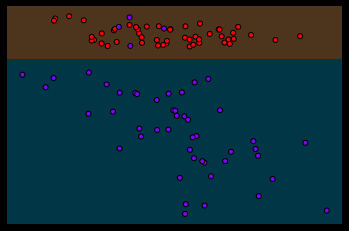

In [107]:
from sklearn.datasets import make_classification

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=2, n_clusters_per_class=1, random_state=0)
visualize_boundary(dt_model, X_features, y_labels)


In [111]:
y_pred = dt_model.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
evaluate_model(dt_model)

Accuracy: 0.86
Train Accuracy : 0.8931718603849751
Train Confusion Matrix:
[[12496  1190]
 [  980  5647]]
--------------------------------------------------
Test Accuracy : 0.8602087025004922
Test Confusion Matrix:
[[3031  397]
 [ 313 1338]]


In [30]:
from sklearn.preprocessing import OneHotEncoder

real_test = pd.read_csv('test.csv')

ohe = OneHotEncoder(sparse=False)
# fit_transform은 train에만 사용하고 test에는 학습된 인코더에 fit만 해야한다
train_cat = ohe.fit_transform(real_test[['type_of_meal_plan']])
train_cat = pd.DataFrame(train_cat)
real_test['meal_type_1'] = train_cat.loc[:, 0]
real_test['meal_type_2'] = train_cat.loc[:, 1]
real_test['meal_type_3'] = train_cat.loc[:, 2]
real_test['meal_type_4'] = train_cat.loc[:, 3]

ohe = OneHotEncoder(sparse=False)
# fit_transform은 train에만 사용하고 test에는 학습된 인코더에 fit만 해야한다
train_cat = ohe.fit_transform(real_test[['room_type_reserved']])
train_cat = pd.DataFrame(train_cat)
real_test['room_type_1'] = train_cat.loc[:, 0]
real_test['room_type_2'] = train_cat.loc[:, 1]
real_test['room_type_3'] = train_cat.loc[:, 2]
real_test['room_type_4'] = train_cat.loc[:, 3]
real_test['room_type_5'] = train_cat.loc[:, 4]
real_test['room_type_6'] = train_cat.loc[:, 5]
real_test['room_type_7'] = train_cat.loc[:, 6]

train_cat = ohe.fit_transform(real_test[['market_segment_type']])
train_cat = pd.DataFrame(train_cat)
real_test['Corporate'] = train_cat.loc[:, 0]
real_test['Complementary'] = train_cat.loc[:, 1]
real_test['Online'] = train_cat.loc[:, 2]
real_test['Offline'] = train_cat.loc[:, 3]
real_test['Aviation'] = train_cat.loc[:, 4]


for i in range(len(real_test)):
    if 17.0 > real_test.loc[i, 'lead_time']:
        real_test.loc[i, 'lead_time_under_iqr_1'] = 1
    else:
        real_test.loc[i, 'lead_time_under_iqr_1'] = 0
    if 17.0 <= real_test.loc[i, 'lead_time'] < 58.0:
        real_test.loc[i, 'lead_time_under_iqr_2'] = 1
    else:
        real_test.loc[i, 'lead_time_under_iqr_2'] = 0
    if 58.0 <= real_test.loc[i, 'lead_time'] < 127.0:
        real_test.loc[i, 'lead_time_under_iqr_3'] = 1
    else:
        real_test.loc[i, 'lead_time_under_iqr_3'] = 0
    if 127.0 <= real_test.loc[i, 'lead_time']:
        real_test.loc[i, 'lead_time_under_iqr_4'] = 1
    else:
        real_test.loc[i, 'lead_time_under_iqr_4'] = 0

for i in range(len(real_test)):
    if 80.7 > real_test.loc[i, 'avg_price_per_room']:
        real_test.loc[i, 'price_under_iqr_1'] = 1
    else:
        real_test.loc[i, 'price_under_iqr_1'] = 0
    if 80.7 <= real_test.loc[i, 'avg_price_per_room'] < 99.8:
        real_test.loc[i, 'price_under_iqr_2'] = 1
    else:
        real_test.loc[i, 'price_under_iqr_2'] = 0
    if 99.8 <= real_test.loc[i, 'avg_price_per_room'] < 120.1:
        real_test.loc[i, 'price_under_iqr_3'] = 1
    else:
        real_test.loc[i, 'price_under_iqr_3'] = 0
    if 120.1 <= real_test.loc[i, 'avg_price_per_room']:
        real_test.loc[i, 'price_under_iqr_4'] = 1
    else:
        real_test.loc[i, 'price_under_iqr_4'] = 0
        
lead_time_norm = (real_test['lead_time'] - real_test['lead_time'].mean())/real_test['lead_time'].std()
price_norm = (real_test['avg_price_per_room'] - real_test['avg_price_per_room'].mean())/real_test['avg_price_per_room'].std()

real_test['lead_time_norm'] = lead_time_norm
real_test['price_norm'] = price_norm

real_test.to_csv('onehot_test.csv', index=False)



In [31]:
real_test.keys()

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'meal_type_1',
       'meal_type_2', 'meal_type_3', 'meal_type_4', 'room_type_1',
       'room_type_2', 'room_type_3', 'room_type_4', 'room_type_5',
       'room_type_6', 'room_type_7', 'Corporate', 'Complementary', 'Online',
       'Offline', 'Aviation', 'lead_time_under_iqr_1', 'lead_time_under_iqr_2',
       'lead_time_under_iqr_3', 'lead_time_under_iqr_4', 'price_under_iqr_1',
       'price_under_iqr_2', 'price_under_iqr_3', 'price_under_iqr_4',
       'lead_time_norm', 'price_norm'],
      dtype='object')

In [39]:
real_test = pd.read_csv('onehot_test.csv')

real_test['lead_12'] = real_test['lead_time_under_iqr_1'] + \
    real_test['lead_time_under_iqr_2']
real_test['lead_34'] = real_test['lead_time_under_iqr_3'] + \
    real_test['lead_time_under_iqr_4']
real_test['price_12'] = real_test['price_under_iqr_1'] + real_test['price_under_iqr_2']
real_test['price_34'] = real_test['price_under_iqr_3'] + real_test['price_under_iqr_4']

feature_names = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                 'no_of_week_nights', 'required_car_parking_space',
                 'arrival_year', 'arrival_month',
                 'arrival_date', 'repeated_guest',
                 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                 'no_of_special_requests',
                 'meal_type_1', 'meal_type_2', 'meal_type_3', 'meal_type_4',
                 'room_type_1', 'room_type_2', 'room_type_3', 'room_type_4',
                 'room_type_5', 'room_type_6', 'room_type_7', 'Corporate',
                 'Complementary', 'Online', 'Offline', 'Aviation',
                 'lead_time_norm', 'price_norm', 'lead_12', 'lead_34', 'price_12', 'price_34']

test = real_test[feature_names]
y_pred = dt_model.predict(test)

sample = pd.DataFrame()
sample['Booking_ID'] = real_test['Booking_ID']
sample['booking_status'] = y_pred
sample.to_csv('sample.csv', index=False)
# real_test.keys()
